### Step 1. 필요한 라이브러리 임포트

In [1]:
import pandas as pd

### Step 2. [데이터](https://raw.githubusercontent.com/Datamanim/pandas/main/under5MortalityRate.csv) 확인

- Location : 지역
- Period : 연도
- Dim1 : 성별(남 : Male, 여 : Female, 모두 : Both sexes)
- First Tooltip : 천명당 사망률(명)

### Step 3. 데이터 불러오기


**read_csv를 통해 데이터를 올바른 형태로 불러온 뒤 df에 저장해주세요**  
data: under5MortalityRate.csv

In [2]:
df = pd.read_csv('../data/under5MortalityRate.csv')

In [4]:
df.head()

,Location,Period,Dim1,First Tooltip
0,Afghanistan,2019,Both sexes,60.27
1,Afghanistan,2019,Male,63.83
2,Afghanistan,2019,Female,56.57
3,Afghanistan,2018,Both sexes,62.54
4,Afghanistan,2018,Male,66.08


### Step 4. 데이터 확인하기
info를 사용하여 확인해주세요

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       29999 non-null  object 
 1   Period         29999 non-null  int64  
 2   Dim1           29999 non-null  object 
 3   First Tooltip  29999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 937.6+ KB


In [3]:
len(df['Location'].unique())

177

In [9]:
len(df['Period'].unique())

70

In [11]:
len(df['Dim1'].unique())

3

In [12]:
177 * 70 * 3

37170

### Step 5. 년도가 2015년 이상, Dim1이 Both sexes인 케이스만 추출해주세요.

In [4]:
df2 = df[(df['Period'] >= 2015) & (df['Dim1'] == 'Both sexes')]
df2.head()

,Location,Period,Dim1,First Tooltip
0,Afghanistan,2019,Both sexes,60.27
3,Afghanistan,2018,Both sexes,62.54
6,Afghanistan,2017,Both sexes,64.94
9,Afghanistan,2016,Both sexes,67.57
12,Afghanistan,2015,Both sexes,70.44


### Step 6. 5번에서 추출한 데이터로 아래와 같이 나라에 따른 년도별 사망률을 데이터 프레임화하세요.
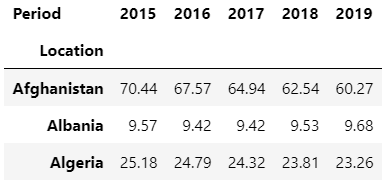

In [17]:
df2.pivot_table(index = 'Location', columns='Period', values = 'First Tooltip')

Period,2015,2016,2017,2018,2019
Location,,,,,
Afghanistan,70.44,67.57,64.94,62.54,60.27
Albania,9.57,9.42,9.42,9.53,9.68
Algeria,25.18,24.79,24.32,23.81,23.26
Andorra,3.53,3.37,3.22,3.09,2.97
Angola,88.20,84.21,80.62,77.67,74.69
...,...,...,...,...,...
Syrian Arab Republic,23.18,23.27,22.97,22.11,21.53
Tajikistan,37.75,36.82,35.81,34.80,33.78
Thailand,10.80,10.32,9.86,9.42,9.01


### Step 7. Dim1에 따른 년도별 사망률의 평균을 구해주세요.

In [5]:
df[(df['Dim1'] == 'Both sexes') & (df['Period'] == 1950)]['First Tooltip'].mean()

147.70081632653063

In [6]:
df.pivot_table(index = 'Dim1', columns = 'Period', values = 'First Tooltip',
              aggfunc='mean')

Period,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Dim1,,,,,,,,,,,,,,,,,,,,,
Both sexes,147.700816,155.537544,157.811094,156.147206,154.539857,155.797179,159.241163,156.170114,150.813222,150.574000,...,37.718488,35.573663,34.290988,33.099360,32.053314,31.012093,29.956337,29.030465,28.083837,27.191744
Female,140.909796,149.210175,151.516094,150.250882,148.688286,149.843205,153.048721,149.988295,144.719667,144.451474,...,34.953023,32.877616,31.654070,30.521337,29.524302,28.544360,27.542035,26.675291,25.782616,24.945349
Male,154.151224,161.538246,163.760781,161.742059,160.081000,161.456923,165.089535,162.015000,156.573556,156.375053,...,40.340174,38.140291,36.793081,35.543663,34.446105,33.354302,32.242616,31.273198,30.283023,29.350349


### Step 8. 나라별 전체 년도에 대한 사망률의 평균을 계산하여 내림차순으로 정렬해주세요.

In [33]:
df[(df['Location'] == 'Afghanistan')]['First Tooltip'].mean()

186.76954022988502

In [7]:
df3 = df.pivot_table(index = 'Location', values = 'First Tooltip', aggfunc='mean')

In [40]:
# df.groupby('Location')['First Tooltip'].mean().to_frame()

In [8]:
df3.sort_values('First Tooltip', ascending=False)

,First Tooltip
Location,
Sierra Leone,257.340437
Niger,247.864591
Guinea,241.964952
Mali,240.763509
Burkina Faso,235.043667
...,...
Czechia,7.493162
San Marino,7.156857
Slovenia,7.114103
